In [1]:
using DifferentialEquations
using Plots

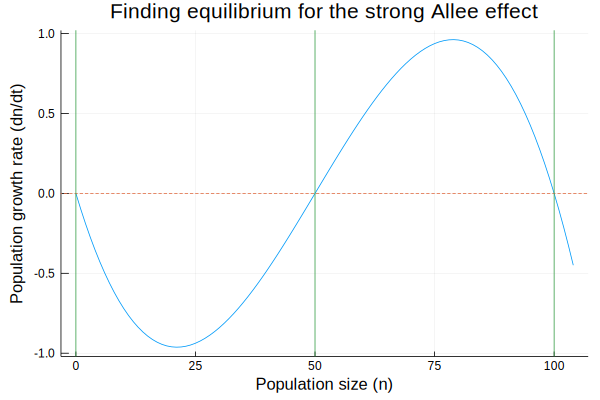

In [39]:
# Generating the strong Allee effect function taking the initial 
# population size n0, different parameters p and a time vector t
function allee_strong(n0, p, t)
    n = n0
    dn_dt_n_strong = n*p.r*((((n/p.A)-1))*(1-(n/p.K)))
    return(dn_dt_n_strong)
end

# Defining the initial population sizes
n0 = 10.0

# Defining the time lapse t0 - t end
t=(0., 500.)

# Defining the parameters
p = (r = 0.1, A = 50, K = 100)

# Plotting the (dn/dt) in function of n(t) graph for the strong Allee effect
dn_dt_n_strong_vec = zeros(Float64, p.K+5)
n_vec = 0:p.K+4
for i in 1:p.K+5
    dn_dt_n_strong_vec[i] = allee_strong(n_vec[i], p, t)
end
plot(n_vec, dn_dt_n_strong_vec, title="Finding equilibrium for the strong Allee effect", xlabel="Population size (n)", ylabel="Population growth rate (dn/dt)", legend =false)
# Adding horizontal line where dn/dt = 0
hline!([0], ls=:dash)
# Adding vertical line for the values of n where the equilibrum should be reach
vline!([0, p.K, p.A])


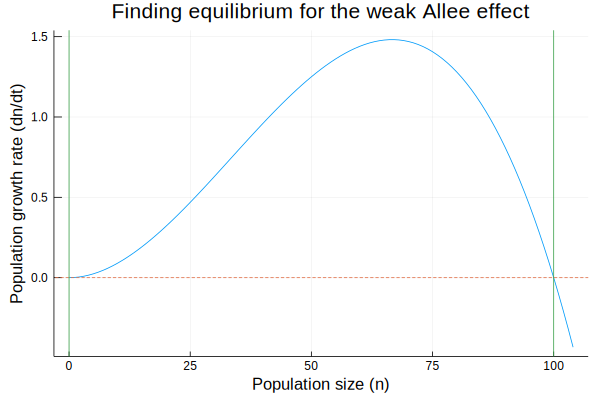

In [44]:
#Generating the weak Allee effec function
function allee_weak(n0, p, t)
    n=n0
    dn_dt_n_weak = (p.r*(n^2)/p.K)*(1-(n/p.K))
    return(dn_dt_n_weak)
end

# Plotting the (dn/dt) in function of n(t) graph for the weak Allee effect
dn_dt_n_weak_vec = zeros(Float64, p.K+5)
n_vec = 0:p.K+4
for i in 1:p.K+5
    dn_dt_n_weak_vec[i] = allee_weak(n_vec[i], p, t)
end
plot(n_vec, dn_dt_n_weak_vec, title="Finding equilibrium for the weak Allee effect", xlabel="Population size (n)", ylabel="Population growth rate (dn/dt)", legend =false)
# Adding horizontal line where dn/dt = 0
hline!([0], ls=:dash)
# Affing vertical line for the values of n where the equilibrum should be reach
vline!([0, p.K])


In [85]:
# Defining the ordinary diffrential equation (ODE) problem different initial population sizes starting from all sides of equilibrium
prob_strong1 = ODEProblem(allee_strong, 0.0, t, p)
prob_strong2 = ODEProblem(allee_strong, 25.0, t, p)
prob_strong3 = ODEProblem(allee_strong, 50.0, t, p)
prob_strong4 = ODEProblem(allee_strong, 75.0, t, p)
prob_strong5 = ODEProblem(allee_strong, 100.0, t, p)
prob_strong6 = ODEProblem(allee_strong, 105.0, t, p)
    
# Resolving the ODE problem
solution_strong1 = solve(prob_strong1)
plot!(solution_strong1, label ="Initial population size: 0 ")

solution_strong2 = solve(prob_strong2)
plot!(solution_strong2, label ="Initial population size: 25 ")

solution_strong3 = solve(prob_strong3)
plot!(solution_strong3, label ="Initial population size: 50 ")

solution_strong4 = solve(prob_strong4)
plot!(solution_strong4, label ="Initial population size: 75 ")

solution_strong5 = solve(prob_strong5)
plot!(solution_strong5, label ="Initial population size: 100 ")

solution_strong6 = solve(prob_strong6)
plot!(solution_strong6, label ="Initial population size: 105 ")



In [19]:
# évaluation équilibre

function eq_strong(p)
    return n_hat = p.A
end


eq_strong_exists(p) = all(eq_strong(p) .>1e-3)
#eq_weak_exists(p) = all(eq_weak(p) .>1e-3)


eq_strong_exists (generic function with 1 method)

In [22]:
# Grid for the search 
possible_values_r = 0.9:0.05:1.1
possible_values = 1:1:500
# Empty array for parameter values 
p_eq_strong = []

# Grid search
for A in possible_values
    for K in possible_values
        for r in possible_values_r
            p = (r=r, A=A, K=K)
            push!(p_eq_strong, p) 
        end
    end
end
# Keep only parameters for which the equilibrium exists 
filter!(eq_strong_exists, p_eq_strong)

1250000-element Array{Any,1}:
 (r = 0.9, A = 1, K = 1)     
 (r = 0.95, A = 1, K = 1)    
 (r = 1.0, A = 1, K = 1)     
 (r = 1.05, A = 1, K = 1)    
 (r = 1.1, A = 1, K = 1)     
 (r = 0.9, A = 1, K = 2)     
 (r = 0.95, A = 1, K = 2)    
 (r = 1.0, A = 1, K = 2)     
 (r = 1.05, A = 1, K = 2)    
 (r = 1.1, A = 1, K = 2)     
 (r = 0.9, A = 1, K = 3)     
 (r = 0.95, A = 1, K = 3)    
 (r = 1.0, A = 1, K = 3)     
 ⋮                           
 (r = 1.05, A = 500, K = 498)
 (r = 1.1, A = 500, K = 498) 
 (r = 0.9, A = 500, K = 499) 
 (r = 0.95, A = 500, K = 499)
 (r = 1.0, A = 500, K = 499) 
 (r = 1.05, A = 500, K = 499)
 (r = 1.1, A = 500, K = 499) 
 (r = 0.9, A = 500, K = 500) 
 (r = 0.95, A = 500, K = 500)
 (r = 1.0, A = 500, K = 500) 
 (r = 1.05, A = 500, K = 500)
 (r = 1.1, A = 500, K = 500) 

In [34]:
# Simulation of one trajectory
p_eq_1 = rand(eq_strong_exists)
prob_eq = ODEProblem(allee_strong, 1, t, p_eq_1)
sol_eq = solve(prob_eq)

ArgumentError: ArgumentError: Sampler for this object is not defined

In [28]:
display(eq_strong_exists)

eq_strong_exists (generic function with 1 method)